# Bonus: Temperature Analysis I

In [39]:
import pandas as pd
from datetime import datetime as dt

In [40]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [41]:
# Convert the date column format from string to datetime
df["date"] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [42]:
# Set the date column as the DataFrame index
# Drop the date column
df = df.set_index('date')
df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


### Compare June and December data across all years 

In [64]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_rel

In [65]:
# Filter data for desired months
june_df = df[df.index.month==6]
dec_df=df[df.index.month==12]

In [66]:
# Identify the average temperature for June
avg_temp_june = round(june_df.tobs.mean(),1)
print(f"The average temperature in June from {june_df.index.year[0]} to {june_df.index.year[-1]} is {avg_temp_june} °F.")

The average temperature in June from 2010 to 2017 is 74.9 °F.


In [67]:
# Identify the average temperature for December
avg_temp_dec = round(dec_df.tobs.mean(),1)
print(f"The average temperature in December from {dec_df.index.year[0]} to {dec_df.index.year[-1]} is {avg_temp_dec} °F.")

The average temperature in December from 2010 to 2016 is 71.0 °F.


In [75]:
# Create collections of temperature dataq
june_temps_df= pd.DataFrame(june_df.tobs).rename(columns={"tobs":"tobs_june"})
dec_temps_df= pd.DataFrame(dec_df.tobs).rename(columns={"tobs":"tobs_dec"})
june_temps_df.

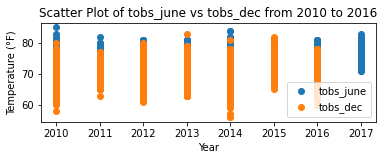

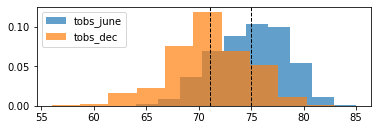

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)


In [98]:
# Run paired t-test
# Generate some fake data to test with
def ttest_plots(dataset1, dataset2):
    # Scatter Plot of Data
    ds1_col=dataset1.columns[0]
    ds2_col=dataset2.columns[0]
    x1_range= dataset1.index.year
    x2_range = dataset2.index.year
    plt.subplot(2, 1, 1)
    plt.scatter(x1_range, dataset1[ds1_col], label=ds1_col)
    plt.scatter(x2_range, dataset2[ds2_col], label=ds2_col)
    plt.xlabel("Year")
    plt.ylabel("Temperature (°F)")
    plt.title(f"Scatter Plot of {ds1_col} vs {ds2_col} from {x1_range[0]} to {x2_range[-1]}")
    plt.legend()
    plt.show()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(dataset1[ds1_col], 10, density=True, alpha=0.7, label=ds1_col)
    plt.hist(dataset2[ds2_col], 10, density=True, alpha=0.7, label=ds2_col)
    plt.axvline(dataset1[ds1_col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(dataset2[ds2_col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    plt.show()
    
    return dataset1[ds1_col], dataset2[ds2_col]
temps_june, temps_dec = ttest_plots(june_temps_df, dec_temps_df)

print(stats.ttest_ind(temps_june,temps_dec, equal_var=False))
